# ベクトルとは何か? 微分方程式のシミュレーションの観点から

## ここまでの復習
ここまでは微分方程式が自然現象のシミュレーションに使えることを紹介し、
実際の微分方程式をいくつか見てきました。
実際のシミュレーションでは本当に微分方程式を厳密に解いているわけではなく、
近似計算をしているのだ、
そして**それは四則演算をやっているだけだ**と紹介してきました。

近似といってもかなりきちんと計算できることをを見るためにも、
とにかくいくつかの実例を紹介することを優先にしてきました。
我慢強いあなたも「もういい加減きちんと数学の紹介して！」
と思ってらっしゃるはずです。

## ベクトルからはじめます
というわけで数学の紹介も簡単にやっていきましょう。
微分方程式なんだからまずは微分ではないのかと思う方もいらっしゃるでしょう。
しかし今回の話の流れでは微分の話をする前にベクトルをやった方がスムーズなので、
ベクトルからいきます。

## ベクトルは矢印
高校でベクトルは向きと大きさがある矢印のことと言われます。
それはそれで大事な見方ですが、
ここでは始点と終点がある矢印と思ってみてください。
始点と終点をつないだ**たくさんのベクトルで作った折れ線**を曲線、つまり**微分方程式の近似解**とみなすのが今回の話のキモだからです。

図のように曲線を適当な間隔でわけましょう。

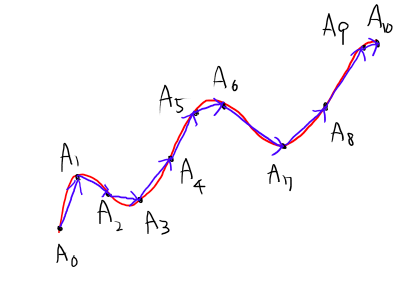

In [ ]:
from IPython.display import Image
Image("https://phasetr.com/members/myfiles/file/mathrefuge0001.png")

わけた点に $A_0、 A_1、 \dots、 A_n$ と順に名前をつけていきます。
そして $A_0$ と $A_1$、 $A_1$ と $A_2$ というふうに始点と終点を入れかえながら隣の点どうしを結んでいきます。
$A_0$ から $A_1$ に向かって進むんだ、
そういう気持ちを表したいのでそれを $\overrightarrow{A_0 A_1}$ と書くことにします。
記号の上の右向き矢印で点 $A_0$ から点 $A_1$ に向かっている気分もはっきり書いています。

ここで何度も始点と終点をつないだ矢印を継ぎ足しています。
この継ぎ足しという図形の操作が**ベクトルの足し算**です。
例を 1 つだけ書いておくと $\overrightarrow{A_0 A_1} + \overrightarrow{A_1 A_2} = \overrightarrow{A_0 A_2}$ です。

## 微分方程式の近似解法との関係
分点を増やせば折れ線が曲線に近づいていきます。
そしてこれこそが微分方程式の近似解法でやっていることです。これだけで気分的に納得できればそれで十分です。

しかしまだまだ腹落ちしない人も多いはずです。
あなたもそうかもしれません。
そこで**プログラムを書いて**図示して様子を見てみましょう。

## 微分方程式のシミュレーションから見たベクトル
高校だとベクトルに関してもっといろいろなことが出てきます。
**定数倍**したり**内積**を取ったり**長さ**を調べたり。
もちろんベクトルそれ自体を勉強するなら議論しておかないと困りますし、
微分方程式をもっときちんと近似して使い倒す観点からも大事です。

しかしここでのポイントは微分方程式から中高数学を大きく眺めることです。
その範囲ではベクトルは矢印であり、足し算は矢印をつないでいくことだと思っておけばどうにかなります。
さらにその矢印をつないでいった折れ線で曲線が近似できることまで知っておけば、
シミュレーションのためのベクトルは完璧です。
他のことは他のことをやるときに絡めてやってみてください。

折れ線をつないでいって曲線を近似する様子をもっときちんと見てみましょう。
具体的な曲線としては円を取り、
それを等分して折れ線近似した様子をプログラムで描きます。
最後に近似がよくなっていく様子をアニメーションで見てみましょう。

# ベクトルでつないだ折れ線で円を近似する
円周上の点を $n$ 分割し折れ線で分点をつなぎます。
まずは個別に図示してみましょう。

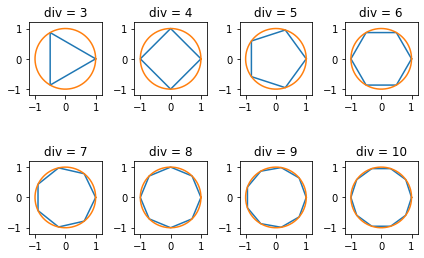

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw_circle_by_polygonal_line(div_num):
    thetas = np.linspace(0, 2 * np.pi, div_num)
    xs = np.cos(thetas)
    ys = np.sin(thetas)

    plt.plot(xs, ys)    
    plt.gca().set_aspect('equal', adjustable='box')

for i in range(4, 12):
    pnum = i - 3
    plt.subplot(2, 4, pnum) # 2x4 の図の配置：下の図を見てみよう。
    plt.xlim([-1.2, 1.2])
    plt.ylim([-1.2, 1.2])
    plt.title("div = " + str(i-1))
    draw_circle_by_polygonal_line(i)    # 折れ線を描く
    draw_circle_by_polygonal_line(1000) # 「円」を描く
    
plt.tight_layout() # オブジェクトの配置を自動調整

### グラフの確認
はじめは円周を 3 等分してそれらを線分でつないでいます。次に 4 等分、5 等分と分割数を増やしていくと、折れ線は円（曲線）に近づいていきます。


### 補足：多面体による 3 次元図形の近似
もしあなたが30歳以上なら、昔の 3D ゲームのポリゴンを覚えているでしょう。念のため参考画像へのリンクを張っておきます。

- [バーチャファイター 1 の画像検索結果](https://www.google.com/search?q=%E3%83%90%E3%83%BC%E3%83%81%E3%83%A3%E3%83%95%E3%82%A1%E3%82%A4%E3%82%BF%E3%83%BC1&tbm=isch&ved=2ahUKEwiXyeu63bDqAhUYR5QKHRM-D7MQ2-cCegQIABAA&oq=%E3%83%90%E3%83%BC%E3%83%81%E3%83%A3%E3%83%95%E3%82%A1%E3%82%A4%E3%82%BF%E3%83%BC1&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADIECAAQGDIECAAQGDIECAAQGDIECAAQGDIECAAQGDIECAAQGFDYLli9MWDFNGgAcAB4AIABVIgBpgGSAQEymAEAoAEBqgELZ3dzLXdpei1pbWc&sclient=img&ei=GPX-XpfdFZiO0QST_LyYCw&bih=549&biw=1176&rlz=1C1ASVC_jaJP896JP896)

画像がカクカクです。
一方で当時対抗馬として有名で、今もあるゲームの鉄拳の新しいバージョンを眺めてみましょう。

- [鉄拳の画像検索結果](https://www.google.com/search?q=%E9%89%84%E6%8B%B37&tbm=isch&ved=2ahUKEwjb747n3bDqAhWhJqYKHelDC8IQ2-cCegQIABAA&oq=%E9%89%84%E6%8B%B37&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCABQ2FBYilJghFVoAHAAeACAAcgBiAHBApIBBTAuMS4xmAEAoAEBqgELZ3dzLXdpei1pbWc&sclient=img&ei=dfX-XpvhDKHNmAXph62QDA&bih=549&biw=1176&rlz=1C1ASVC_jaJP896JP896)

非常に滑らかな CG になっています。
これは上で見た一連の画像と同じです。
「分割数」が少ないとカクカクで、「分割数」が多いと滑らかになるのです。
こうなった理由の一つは、コンピューター（ここでは特にゲーム機）の処理速度が上がって短い時間でたくさん計算できるようになり、滑らかさがあげられたことです。

このゲームの進化と微分方程式のシミュレーションにも深い関係があります。
興味があればぜひゲームプログラミングなども勉強してみてください。
最近は VR などでの CG 作成も発展していて遊べる要素はたくさんあります。

# ベクトルでつないだ折れ線で円を近似する
話を戻しましょう。
先程の折れ線を 9 分割までを重ねて 1 つの図にしてみましょう。

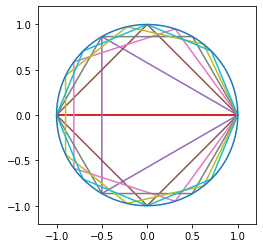

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw_circle_by_polygonal_line(div_num):
    thetas = np.linspace(0, 2 * np.pi, div_num)
    xs = np.cos(thetas)
    ys = np.sin(thetas)

    plt.plot(xs, ys)    
    plt.gca().set_aspect('equal', adjustable='box')

for div_num in range(10):
    draw_circle_by_polygonal_line(div_num) # 折れ線を（たくさん）書いている

draw_circle_by_polygonal_line(1000)    
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.show()

## 注意
この図に特に意味はありません。
重ねてみたら**私が楽しかった**だけです。
こういう感じで遊んでみてください。
そのための例示です。

# アニメーションにしてみる
分割を細かくしていくことで精度が上がる様子をアニメーションで見られます。
図の両端にある「+」「-」ボタンでアニメーションのスピードを変えられるので適当に変えて遊んでみてください。
ローカル実行での Jupyter notebook ではアニメーション用の枠が出ていないかもしれません：その場合はセルを実行すればアニメーションがはじまるはずです。

出先で勉強していたり、プログラムが実行できないこともあるでしょう。
YouTube に動画をアップロードしておいたので、必要なら次のリンクから確認して下さい。

- [YouTube へのリンク](https://youtu.be/8u4sXWUkctw)

次の再生リストにはいろいろな数値計算アニメーションを載せています。
眺めてみると楽しいと思うので参考にしてください。

- [YouTube のリスト](https://www.youtube.com/watch?v=EcDV2Jj5TWU&list=PLSBzltjFopraTJUYDMXnj1GdYCdR0QyzU)

チャンネル登録もどうぞ。

- [チャンネル登録](https://www.youtube.com/channel/UCZ0p3rtw65Kw7BeR-hdndMw?sub_confirmation=1)

In [1]:
from IPython.display import HTML
from matplotlib import animation
import numpy as np
import matplotlib.pyplot as plt

def circle_data(div_num):
    thetas = np.linspace(0, 2 * np.pi, div_num)
    xs = np.cos(thetas)
    ys = np.sin(thetas)
    return (xs, ys)

# アニメーション用のデータ集
circles = []
for i in range(4, 31):
    circles.append(circle_data(i))

# 初期化
fig = plt.figure()
ax = plt.axes(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))
line, = ax.plot([], [], lw=2)
# アスペクト比を等しくする
plt.gca().set_aspect('equal', adjustable='box')

def animate(data):
    x = data[0]
    y = data[1]
    line.set_data(x, y)
    return line

anim = animation.FuncAnimation(fig, animate, frames=circles, interval=100)
plt.close(anim._fig)
HTML(anim.to_jshtml(default_mode='reflect'))

## 曲線と幾何学
これは単純な話ですし、高校では実際にベクトルと幾何は強く結びついています。
少し応用しただけで当たり前の結果でさえありますが、
中高の数学であまり強調されることがない世界でもあります。

そしてこのアニメーションに関して「ベクトルの新たな応用を知った。面白かったし感動した。」という声もよく聞きます。
今となっては大したことではありませんが、昔はこの程度のことさえ難しかったのです。
コンピューター自体が恐ろしく高価でしたし、それを扱う技術も非常に難しかったのです。
それがいまやこんなに手軽に試せて遊べるようになっています。
本当に私が学生の頃は考えられなかったような事態なのです。
ぜひあなた自身でもいろいろ試してみてください。

ここまで物理現象とその時間発展という形で常微分方程式を紹介してきました。
常微分方程式は幾何学的には曲線を記述する方程式でもありますし、
実際に**微分幾何**と呼ばれる分野ではいろいろな曲線と微分方程式の議論が出てきます。
幾何学模様を描くと思えば遊ぶ方向性も増えるでしょう。

今回はここまでです。
お疲れ様でした。

# アンケート
毎回アンケートを取っています。
質問や要望がある場合もこちらにどうぞ。

- [アンケートへのリンク](https://goo.gl/forms/hn7bUP4sblqOkBcI3)

アンケートは匿名なので気楽にコメントしてください。
直接返事してほしいことがあれば、
メールなど適当な手段で連絡してください。